# 附录 E：Lagrange 乘子

## 等式约束下的拉格朗日乘子

拉格朗日乘子（`Lagrange multipliers`），又叫不定乘子（`undetermined multipliers`），用于找到多变量函数在有约束条件下的驻点。

考虑最大化函数 $f(x_1, x_2)$，约束条件为

$$
g(x_1, x_2) = 0
$$

一个可能的方法是通过这个约束求出 $x_2 = h(x_1)$ 再带入函数消去 $x_2$，但很多时候函数 $h$ 是很难找到的。

一个更普遍和简单的方法是引入一个拉格朗日乘子 $\lambda$。

现在考虑一个 $D$ 维变量 $\mathbf x$ 的优化问题：

$$
\begin{align}
\max_{\mathbf x}~& f(\mathbf x) \\
s.t.~& g(\mathbf x) = 0
\end{align}
$$

$g(\mathbf x) = 0$ 定义了空间中一个 $D-1$ 维的超平面。

我们注意到，梯度 $\triangledown g(\mathbf x)$ 平行于这个超平面 $g(\mathbf x) = 0$。

考虑超平面上的两点 $\mathbf x, \mathbf{x+\epsilon}$，做泰勒展开有：

$$
g(\mathbf{x+\epsilon}) \approx g(\mathbf{x}) + \mathbf\epsilon^{\text{T}} \triangledown g(\mathbf x) 
$$

因为它们都在超平面上，所以有 $\mathbf\epsilon^{\text{T}} \triangledown g(\mathbf x) \approx 0$，令 $\|\mathbf \epsilon\|\to 0$，我们有 $\mathbf\epsilon^{\text{T}} \triangledown g(\mathbf x) = 0$，而 $\epsilon$ 平行于超平面，所以 $\triangledown g(\mathbf x)$ 平行于超平面。

在这个超平面上，最大化 $f(\mathbf x)$ 的点 $\mathbf x^\star$ 也需要满足 $\triangledown f(\mathbf x^\star)$ 垂直于超平面 $g(\mathbf x) = 0$，否则，我们总可以在这个超平面上移动一点距离使得 $f(\mathbf x)$ 增大。

因此 $\triangledown f(\mathbf x^\star)$ 与 $\triangledown g(\mathbf x^\star)$ 应当平行，这意味着存在 $\lambda \neq 0$，使得：

$$
\triangledown f + \lambda \triangledown g = 0
$$

此时我们可以引入一个拉格朗日函数：

$$
L(\mathbf x, \lambda) \equiv f(\mathbf x) + \lambda g(\mathbf x)
$$

其驻点满足 $\triangledown_x L = 0$ 即 $
\triangledown f + \lambda \triangledown g = 0
$，以及偏导 $\frac{\partial L}{\partial \lambda}$ 使得 $g(\mathbf x) = 0$。

因此，问题转化为求这个拉格朗日函数的驻点 $(x^\star, \lambda)$。

由于拉格朗日函数是无约束的，我们很容易通过求偏导得到驻点的值。

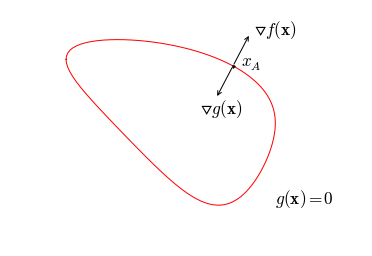

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%matplotlib inline

fig, ax = plt.subplots()

an = np.linspace(0, 2*np.pi, 100)

xx, yy = -20 / (3 - np.cos(an)), -7 / (2 + np.sin(an)) + np.cos(an)

ax.plot(xx, yy, 'r')

ax.set_xlim(-11, -3)
ax.set_ylim(-8, -1)

x, y = xx[30], yy[30]

ax.annotate("",
            xy=(x, y), 
            xytext=(x+0.4, y+1),
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3")
           )

ax.annotate("",
            xy=(x, y), 
            xytext=(x-0.4, y-1),
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3")
           )

ax.text(-5, -7, "$g(\mathbf{x}) = 0$", fontsize="xx-large")

ax.text(x+0.5, y+1, r"$\triangledown f(\mathbf{x})$", fontsize="xx-large")
ax.text(x-0.8, y-1.5, r"$\triangledown g(\mathbf{x})$", fontsize="xx-large")
ax.text(x+0.2, y, '$x_A$', fontsize="xx-large")

ax.set_axis_off()

ax.plot([x], [y], 'k.', linewidth=30)

plt.show()

## 例子

考虑这样的问题：

$$
\begin{align}
\max_{x_1, x_2}~& f(x_1, x_2)=1-x_1^2-x_2^2 \\
s.t.~& g(x_1,x_2) = x_1 + x_2 - 1 = 0
\end{align}
$$

对应的拉格朗日函数为

$$
L(\mathbf x, \lambda) = 1-x_1^2-x_2^2 + \lambda(x_1 + x_2 - 1)
$$

驻点满足：

$$
\begin{align}
-2x_1 + \lambda & = 0\\
-2x_2 + \lambda & = 0\\
x_1 + x_2 - 1 & = 0 \\
\end{align}
$$

因此得到 $(x_1^\star, x_2^\star)=(\frac 1 2, \frac 1 2)$，$\lambda = 1$。

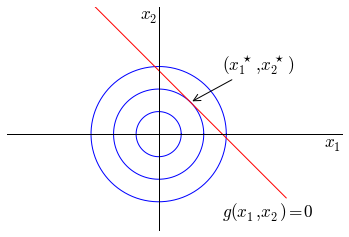

In [2]:
an = np.linspace(0, 2*np.pi, 100)

xx = np.linspace(-1, 2)
yy = 1 - xx

fig, ax = plt.subplots()

for i in xrange(1, 4):
    ax.plot(i / np.sqrt(8.0) * np.cos(an), i / np.sqrt(8.0) * np.sin(an), 'b')

ax.plot(xx, yy, 'r')    

ax.axis('equal')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.set_xticks([])
ax.set_yticks([])

ax.text(2.6, -0.2, "$x_1$", fontsize="xx-large")
ax.text(-0.3, 1.8, "$x_2$", fontsize="xx-large")
ax.text(1, -1.3, "$g(x_1, x_2) = 0$", fontsize="xx-large")

ax.annotate(r"$(x_1^\star, x_2^\star)$", 
            fontsize="xx-large",
            xytext=(1, 1), 
            xy=(0.5, 0.5),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")
           )

plt.show()

## 带不等式约束的拉格朗日乘子

现在考虑不等式约束的问题：

$$
\begin{align}
\max_{\mathbf x}~& f(\mathbf x) \\
s.t.~& g(\mathbf x) \geq 0
\end{align}
$$

分成两种情况考虑：

- $g(\mathbf x) < 0$，此时不等式约束不起作用（`inactive`），驻点的条件为 $\triangledown f(\mathbf x)=0$，因此必须有 $\lambda=0$。


- $g(\mathbf x) = 0$，此时不等式约束起作用（`active`），驻点的条件为 $\triangledown f(\mathbf x) + \lambda \triangledown g(\mathbf x)=0$，且 $\lambda \neq 0$。除此之外，$\triangledown f(\mathbf x)$ 应当与 $\triangledown g(\mathbf x)$ 的方向（指向 $g(\mathbf x)>0$ 的区域）相反才能得到最大值（即 $f$ 的梯度方向要远离 $g(\mathbf x)>0$ 的区域），因此我们必然有 $\lambda > 0$。
    
在这两种情况下，我们都有 $\lambda g(\mathbf x) = 0$，因此问题转换为求解拉格朗日函数

$$
L(\mathbf x, \lambda) \equiv f(\mathbf x) + \lambda g(\mathbf x)
$$

在约束

$$
\begin{align}
g(\mathbf x)&\geq 0\\
\lambda &\geq 0\\
\lambda g(\mathbf x) &= 0
\end{align}
$$

下的驻点，这些条件就是著名的 KKT 条件。

对于最小化问题，我们只需要将拉格朗日函数变为：

$$
L(\mathbf x, \lambda) \equiv f(\mathbf x) - \lambda g(\mathbf x)
$$

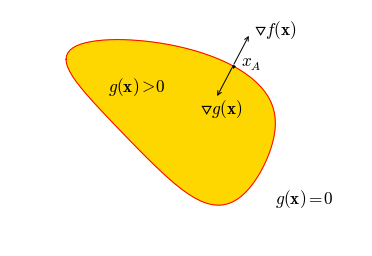

In [3]:
fig, ax = plt.subplots()

an = np.linspace(0, 2*np.pi, 100)

xx, yy = -20 / (3 - np.cos(an)), -7 / (2 + np.sin(an)) + np.cos(an)

ax.plot(xx, yy, 'r')

ax.fill(xx, yy, color='gold')

ax.set_xlim(-11, -3)
ax.set_ylim(-8, -1)

x, y = xx[30], yy[30]

ax.annotate("",
            xy=(x, y), 
            xytext=(x+0.4, y+1),
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3")
           )

ax.annotate("",
            xy=(x, y), 
            xytext=(x-0.4, y-1),
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3")
           )

ax.text(-5, -7, "$g(\mathbf{x}) = 0$", fontsize="xx-large")
ax.text(-9, -3.5, "$g(\mathbf{x}) > 0$", fontsize="xx-large")

ax.text(x+0.5, y+1, r"$\triangledown f(\mathbf{x})$", fontsize="xx-large")
ax.text(x-0.8, y-1.5, r"$\triangledown g(\mathbf{x})$", fontsize="xx-large")
ax.text(x+0.2, y, '$x_A$', fontsize="xx-large")

ax.plot([x], [y], 'k.', linewidth=30)

ax.set_axis_off()

plt.show()

## 多约束问题

考虑这个问题：

$$
\begin{align}
\max_{\mathbf x}~& f(\mathbf x) &\\
s.t.~& g_j(\mathbf x) \geq 0, &&j = 1,\dots,J \\
& h_k(\mathbf x) \geq 0, &&k = 1,\dots,K \\
\end{align}
$$

很容易推广得到，拉格朗日函数为：

$$
\begin{align}
& L(\mathbf {x, \lambda, \mu}) \equiv f(\mathbf x) + \sum_{j=1}^J \lambda_j g(\mathbf x) + \sum_{k=1}^K \mu_k h(\mathbf x) \\
s.t.~& \mu_k \geq 0, \mu_k h(\mathbf x) = 0, k = 1,\dots,K 
\end{align}
$$